<a href="https://colab.research.google.com/github/roshi45/Heart_disease_Prediction/blob/main/HEARTDISEASES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle
import tensorflow as tf

In [33]:
# Load dataset
df=pd.read_csv("/content/heart_disease.csv")

In [30]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [34]:
# Data Cleaning
df.dropna(inplace=True)

# Encoding categorical variables
df.replace({
    'Gender': {'Female': 0, 'Male': 1},
    'Exercise Habits': {'Low': 1, 'Medium': 2, 'High': 3},
    'Alcohol Consumption': {'Low': 1, 'Medium': 2, 'High': 3},
    'Stress Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Sugar Consumption': {'Low': 1, 'Medium': 2, 'High': 3},
    'Smoking': {'Yes': 1, 'No': 0},
    'Family Heart Disease': {'Yes': 1, 'No': 0},
    'Diabetes': {'Yes': 1, 'No': 0},
    'High Blood Pressure': {'Yes': 1, 'No': 0},
    'Low HDL Cholesterol': {'Yes': 1, 'No': 0},
    'High LDL Cholesterol': {'Yes': 1, 'No': 0},
    'Heart Disease Status': {'Yes': 1, 'No': 0}
}, inplace=True)

<ipython-input-34-e574b043625e>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [35]:
# Normalize data
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

In [36]:
# Splitting Data
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train and Evaluate Models
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    return model

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [39]:
trained_models = {name: train_and_evaluate(model, name) for name, model in models.items()}


Logistic Regression Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1121
         1.0       0.00      0.00      0.00       293

    accuracy                           0.79      1414
   macro avg       0.40      0.50      0.44      1414
weighted avg       0.63      0.79      0.70      1414



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors Accuracy: 0.77
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      1121
         1.0       0.27      0.07      0.11       293

    accuracy                           0.77      1414
   macro avg       0.53      0.51      0.49      1414
weighted avg       0.69      0.77      0.71      1414

Support Vector Machine Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1121
         1.0       0.00      0.00      0.00       293

    accuracy                           0.79      1414
   macro avg       0.40      0.50      0.44      1414
weighted avg       0.63      0.79      0.70      1414

Naive Bayes Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1121
         1.0       0.00      0.00      0.00       293

    accuracy                           0.79      1414
   macro avg       0.40     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1121
         1.0       0.00      0.00      0.00       293

    accuracy                           0.79      1414
   macro avg       0.40      0.50      0.44      1414
weighted avg       0.63      0.79      0.70      1414



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1121
         1.0       0.00      0.00      0.00       293

    accuracy                           0.79      1414
   macro avg       0.40      0.50      0.44      1414
weighted avg       0.63      0.79      0.70      1414



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Save best model (example: Naive Bayes)
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(trained_models["Naive Bayes"], file)

In [41]:
# Deep Learning Model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer=tf.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50, verbose=0)
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 0.6135


[0.6209515333175659, 0.7673267126083374]

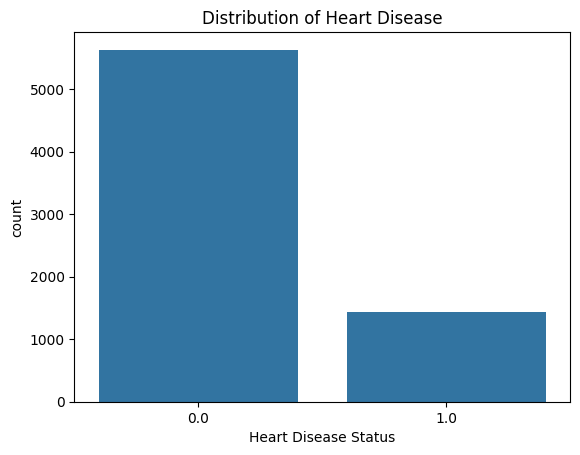

In [42]:
# Visualization
sns.countplot(x='Heart Disease Status', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

In [43]:
# Check model performance
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.79
K-Nearest Neighbors Accuracy: 0.77
Support Vector Machine Accuracy: 0.79
Naive Bayes Accuracy: 0.79
Decision Tree Accuracy: 0.65
Random Forest Accuracy: 0.79
Gradient Boosting Accuracy: 0.79


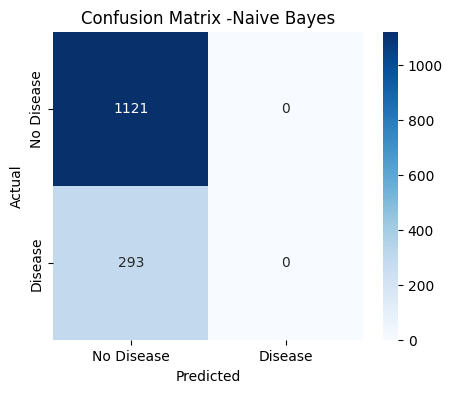

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix for a selected model
y_pred_rf = trained_models["Naive Bayes"].predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix -Naive Bayes")
plt.show()
